### Importing Libraries

In [1]:
#importing libraries
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Reading Data

### dataset link: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
#Exploring Unique data 
print(data['gender'].unique())
print(data['work_type'].unique())
print(data['Residence_type'].unique())
print(data['smoking_status'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [5]:
#checking for null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Note:
- These Null values can be also filled by mean, median or mode method but instead as the dataset is large I've decided to remove all the null vlaues

In [6]:
data.dropna(inplace=True)
print(data.isnull().sum())
print(data.shape)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
(4909, 12)


In [7]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
#Removing unwanted data 'id' without changing original dataset
fd=data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']]

In [9]:
# Applying label encoder to make string values numerical values
le = LabelEncoder()
fd = fd.apply(le.fit_transform)
fd.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3734,239,1,1
2,1,101,0,1,1,2,0,2429,198,2,1
3,0,70,0,0,1,2,1,3309,217,3,1
4,0,100,1,0,1,3,0,3318,113,2,1
5,1,102,0,0,1,2,1,3367,163,1,1


In [10]:
#Exploring Unique data 
print(fd['gender'].unique())
print(fd['work_type'].unique())
print(fd['smoking_status'].unique())

[1 0 2]
[2 3 0 4 1]
[1 2 3 0]


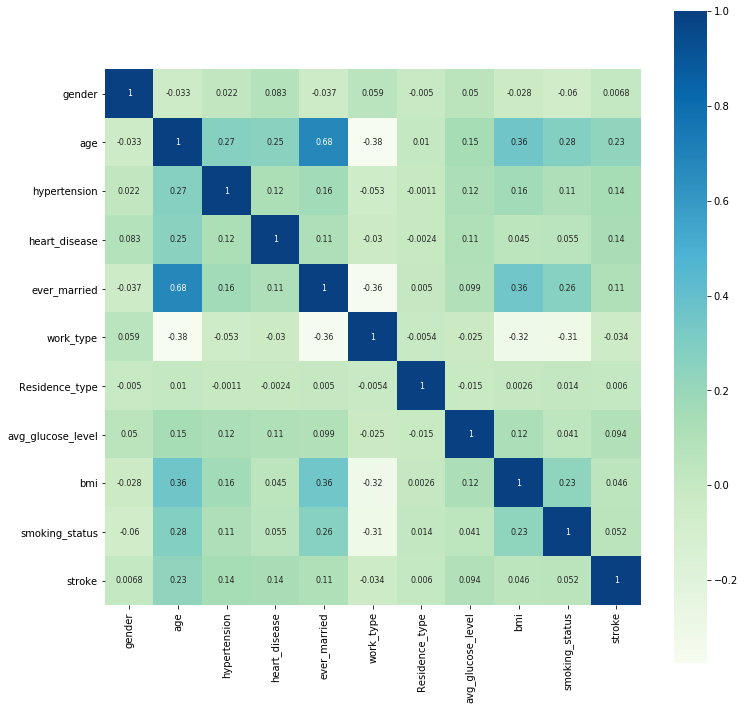

In [11]:
#plotting heatmap 
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(fd.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.show ()

- Age is having more correlation with stroke which means we can say age is proptional to chances of stroke

In [12]:
y = fd['stroke']
x = fd.drop('stroke', axis = 1)

In [13]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3734,239,1
2,1,101,0,1,1,2,0,2429,198,2
3,0,70,0,0,1,2,1,3309,217,3
4,0,100,1,0,1,3,0,3318,113,2
5,1,102,0,0,1,2,1,3367,163,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,34,0,0,0,4,0,2324,59,0
5106,0,102,0,0,1,3,1,2960,273,2
5107,0,56,0,0,1,3,0,1290,179,2
5108,1,72,0,0,1,2,0,3289,129,1


In [14]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [15]:
y.unique()

array([1, 0], dtype=int64)

### Data spliting

In [16]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)
#printing shape of data after spliting
print(x_train.shape)
print(x_valid.shape)

(3927, 10)
(982, 10)


### Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(x_train, y_train)

In [18]:
y_pred_rf = rf.predict(x_valid)

In [19]:
print(metrics.confusion_matrix(y_valid, y_pred_rf))

[[939   1]
 [ 42   0]]


In [20]:
# Create confusion matrix
pd.crosstab(y_valid, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1
Actual Class,,
0,939,1
1,42,0


In [21]:
acc_rf = metrics.accuracy_score(y_valid, y_pred_rf)*100
acc_rf

95.62118126272912

### Prediction 

In [27]:
test_data = pd.read_csv('Book1.csv')
test_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3734,239,1
1,1,101,0,1,1,2,0,2429,198,2
2,0,34,0,0,0,4,0,2324,59,0
3,0,56,0,0,1,3,0,1290,179,2
4,1,102,0,0,1,2,1,3367,163,1


In [28]:
stroke =model_rf.predict(test_data)

In [29]:
stroke

array([1, 1, 0, 0, 1], dtype=int64)

In [30]:
test_data['chances_stroke']=stroke
test_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,chances_stroke
0,1,88,0,1,1,2,1,3734,239,1,1
1,1,101,0,1,1,2,0,2429,198,2,1
2,0,34,0,0,0,4,0,2324,59,0,0
3,0,56,0,0,1,3,0,1290,179,2,0
4,1,102,0,0,1,2,1,3367,163,1,1


In [33]:
#import joblib  
  
# Save the model as a pickle in a file 
joblib.dump(model_rf, 'stroke.pkl') 
  
# Load the model from the file 
rf_from_joblib = joblib.load('stroke.pkl')  
  
# Use the loaded model to make predictions 
rf_from_joblib.predict(x_train) 


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)